In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [10]:
df = pd.read_csv('data/final_cohort.csv')

In [11]:
df.head()

,Date,knumber,Name,Manufactuer,Specialty,Product_Code,artificial_intelligence1,machine_learning1,neural_network1,neural_networks1,deep_learning1,reinforcement_learning1,natural_language_processing1,decision_tree1,xgboost1,gradient_boosted1,gradient_boosting1,ensemble1,big_data1,AI1,ML1,DL1,DNN1,CNN1,RNN1,NLP1,phantom1,specificity1,sensitivity1,risk_assessment1,time_to_open1,time_to_notification1,human_factor1,ease_of_use1,ease_of_training1,standards1,industry_standards1,risk_management1,risk1,retrospective1,prospective1,summary1,FDA,STUDY,CLINICAL_TRIALS,STUDY_SIZE,Site,STATE,COUNTRY_CODE,CT,multisite,Performance,Jiang,REVIEW_PANEL,MEDICALSPECIALTY,DEVICENAME,DEVICECLASS,UNCLASSIFIED_REASON,GMPEXEMPTFLAG,THIRDPARTYFLAG,REVIEWCODE,REGULATIONNUMBER,SUBMISSION_TYPE_ID,DEFINITION,PHYSICALSTATE,TECHNICALMETHOD,TARGETAREA,Implant_Flag,Life_Sustain_support_flag,SummaryMalfunctionReporting,summary,key_index,year,study1,path
0,08/21/2013,DEN130013,Vitek MS,"Biomerieux, Inc.",Other,PEX,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,NaN,2256.0,3,MO,US,0,1,1,0,MI,MI,"System, Mass Spectrometry, Maldi Tof, Microorg...",2,NaN,N,N,NaN,866.3361,1,A mass spectrometer system using matrix-assist...,In vitro diagnostic device,Matrix-assisted laser desorption/ionization - ...,Identification of microorganisms cultured from...,N,N,Ineligible,1,1,2013,1,DEN
1,02/10/2004,K033840,CellaVision DM96 Automatic Hematology Analyzer,Cella Vision AB,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MN,US,0,0,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2004,0,510K
2,12/05/2008,K080595,CellaVision DM96 with the body fluid application,Cella Vision AB,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MN,US,0,0,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2008,0,510K
3,05/12/2010,K092116,EasyCell,Medica Corporation,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MA,US,0,0,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2010,0,510K
4,09/16/2011,K102778,CellaVision� DM1200 with the body fluid applic...,CellaVision AB,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,2,MN,US,0,1,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2011,0,510K


In [20]:
df['Origin'] = df.apply(lambda row: row['STATE'] + ', ' + row['COUNTRY_CODE'] if not pd.isnull(row['STATE']) else row['COUNTRY_CODE'], axis = 1)


In [22]:
website_table = df[['Name', 'knumber', 'Date', 'Manufactuer', 'Specialty', 'Origin']]


In [31]:
from datetime import datetime

In [24]:
table_html = website_table.to_html(index=False)

In [57]:
formatted_html = ""
for line in table_html.split('\n'):
    if '<td>' in line:
        value = line.split('>')[1].split('<')[0]
        try:
            format_date = datetime.strptime(value, '%m/%d/%Y').strftime('%Y-%m-%d 12:00')
            formatted_html = formatted_html + line.split('>')[0] + ' data-order="{0}">'.format(format_date) + line.split('>')[1] + '>\n'
        except:
            formatted_html = formatted_html + line + '\n'
    else:
        formatted_html = formatted_html + line + '\n'

In [58]:
print(formatted_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Name</th>
      <th>knumber</th>
      <th>Date</th>
      <th>Manufactuer</th>
      <th>Specialty</th>
      <th>Origin</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Vitek MS</td>
      <td>DEN130013</td>
      <td data-order="2013-08-21 12:00">08/21/2013</td>
      <td>Biomerieux, Inc.</td>
      <td>Other</td>
      <td>MO, US</td>
    </tr>
    <tr>
      <td>CellaVision DM96 Automatic Hematology Analyzer</td>
      <td>K033840</td>
      <td data-order="2004-02-10 12:00">02/10/2004</td>
      <td>Cella Vision AB</td>
      <td>Other</td>
      <td>MN, US</td>
    </tr>
    <tr>
      <td>CellaVision DM96 with the body fluid application</td>
      <td>K080595</td>
      <td data-order="2008-12-05 12:00">12/05/2008</td>
      <td>Cella Vision AB</td>
      <td>Other</td>
      <td>MN, US</td>
    </tr>
    <tr>
      <td>EasyCell</td>
      <td>K092116</td>
      <td data-order="20

## Make Timeline in Python

In [90]:
names = df['knumber']
dates = df['Date']

In [91]:
dates

0      08/21/2013
1      02/10/2004
2      12/05/2008
3      05/12/2010
4      09/16/2011
          ...    
204    12/29/2020
205    03/02/2021
206    02/05/2021
207    11/09/2016
208    01/11/2021
Name: Date, Length: 209, dtype: object

In [92]:
min(dates)

'01/04/2018'

In [93]:
max(dates)

'12/29/2020'

In [94]:
dates = [datetime.strptime(x, "%m/%d/%Y") for x in dates]

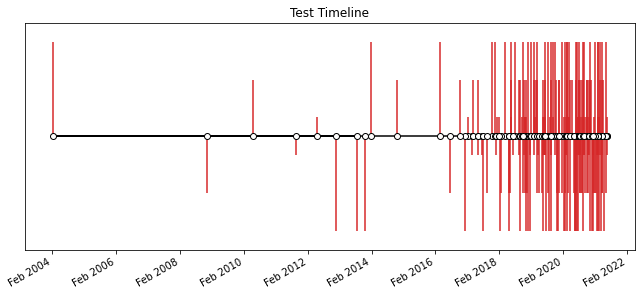

In [95]:
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Test Timeline")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
# for d, l, r in zip(dates, levels, names):
#     ax.annotate(r, xy=(d, l),
#                 xytext=(-3, np.sign(l)*3), textcoords="offset points",
#                 horizontalalignment="right",
#                 verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [137]:
df['month_year'] = df['Date'].apply(lambda x: x.split('/')[0] + '/15/' + x.split('/')[2])

In [97]:
df['quarter_year'] = df['month_year'].apply(quarter_parse)

In [98]:
def quarter_parse(x):
    if x.split('/')[0] in ['01', '02', '03']:
        return '02/15/' + x.split('/')[1]
    if x.split('/')[0] in ['04', '05', '06']:
        return '5/15/' + x.split('/')[1]
    if x.split('/')[0] in ['07', '08', '09']:
        return '8/15/' + x.split('/')[1]
    if x.split('/')[0] in ['10', '11', '12']:
        return '11/15/' + x.split('/')[1]
    

In [142]:
def specialty_sort(x):
    if x == 'Radiology': 
        return 0
    elif x == 'Cardiovascular':
        return 1
    else:
        return 2
def path_sort(x):
    if x == '510K': 
        return 0
    elif x == 'DEN':
        return 1
    else:
        return 2

In [147]:
df['specialty_sort'] = df['Specialty'].apply(specialty_sort)
df['path_sort'] = df['Specialty'].apply(path_sort)

In [152]:
master_df = pd.DataFrame(columns = df.columns)
for qrt_yr in set(df['quarter_year'].values):
    tempdf = df[df['quarter_year'] == qrt_yr]
    tempdf = tempdf.sort_values(by='path_sort').sort_values(by = 'specialty_sort')
    tempdf['height'] = range(len(tempdf))
    master_df = master_df.append(tempdf)
master_df[['quarter_year', 'Name', 'Specialty', 'path', 'height']].to_csv('data/timeline_quarter_data.csv')

In [153]:
master_df = pd.DataFrame(columns = df.columns)
for qrt_yr in set(df['month_year'].values):
    tempdf = df[df['month_year'] == qrt_yr]
    tempdf = tempdf.sort_values(by='path_sort').sort_values(by = 'specialty_sort')
    tempdf['height'] = range(len(tempdf))
    master_df = master_df.append(tempdf)
master_df[['month_year', 'Name', 'Specialty', 'path', 'height']].to_csv('data/timeline_month_data.csv')

In [144]:
tempdf

,Date,knumber,Name,Manufactuer,Specialty,Product_Code,artificial_intelligence1,machine_learning1,neural_network1,neural_networks1,deep_learning1,reinforcement_learning1,natural_language_processing1,decision_tree1,xgboost1,gradient_boosted1,gradient_boosting1,ensemble1,big_data1,AI1,ML1,DL1,DNN1,CNN1,RNN1,NLP1,phantom1,specificity1,sensitivity1,risk_assessment1,time_to_open1,time_to_notification1,human_factor1,ease_of_use1,ease_of_training1,standards1,industry_standards1,risk_management1,risk1,retrospective1,prospective1,summary1,FDA,STUDY,CLINICAL_TRIALS,STUDY_SIZE,Site,STATE,COUNTRY_CODE,CT,multisite,Performance,Jiang,REVIEW_PANEL,MEDICALSPECIALTY,DEVICENAME,DEVICECLASS,UNCLASSIFIED_REASON,GMPEXEMPTFLAG,THIRDPARTYFLAG,REVIEWCODE,REGULATIONNUMBER,SUBMISSION_TYPE_ID,DEFINITION,PHYSICALSTATE,TECHNICALMETHOD,TARGETAREA,Implant_Flag,Life_Sustain_support_flag,SummaryMalfunctionReporting,summary,key_index,year,study1,path,month_year,quarter_year,specialty_sort,height
85,08/12/2019,K183182,Critical Care Suite,"GE Medical Systems, LLC",Radiology,QFM,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,NaN,804.0,yes,WI,US,0,1,1,1,RA,RA,Radiological Computer-Assisted Prioritization ...,2,NaN,N,N,NaN,892.208,1,Radiological computer-assisted prioritization ...,The device is software only.,The device provides triage or notification tha...,The device operates on radiological images of ...,N,N,Ineligible,1,2,2019,1,510K,08/15/2019,8/15/2019,0,0
96,08/29/2019,K183489,D2P,"3D Systems, Inc.",Radiology,LLZ,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,NaN,NaN,NaN,NaN,IL,0,0,1,1,RA,RA,"System, Image Processing, Radiological",2,NaN,N,Y,NaN,892.205,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,2,2019,0,510K,08/15/2019,8/15/2019,0,1
92,08/15/2019,K183282,Biovitals Analytics Engine,Biofourmis Singapore Pte. Ltd,Cardiovascular,PLB,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,"NCT02391987, NCT03661606",50.0,NaN,NaN,SG,1,0,0,1,CV,CV,Multivariate Vital Signs Index,2,NaN,N,N,NaN,870.230,1,Automated calculation of a summary index (or i...,software/firmware,Collects measured parameter inputs and automat...,Various,N,N,Eligible,1,0,2019,1,510K,08/15/2019,8/15/2019,1,2


In [135]:
master_df

,Date,knumber,Name,Manufactuer,Specialty,Product_Code,artificial_intelligence1,machine_learning1,neural_network1,neural_networks1,deep_learning1,reinforcement_learning1,natural_language_processing1,decision_tree1,xgboost1,gradient_boosted1,gradient_boosting1,ensemble1,big_data1,AI1,ML1,DL1,DNN1,CNN1,RNN1,NLP1,phantom1,specificity1,sensitivity1,risk_assessment1,time_to_open1,time_to_notification1,human_factor1,ease_of_use1,ease_of_training1,standards1,industry_standards1,risk_management1,risk1,retrospective1,prospective1,summary1,FDA,STUDY,CLINICAL_TRIALS,STUDY_SIZE,Site,STATE,COUNTRY_CODE,CT,multisite,Performance,Jiang,REVIEW_PANEL,MEDICALSPECIALTY,DEVICENAME,DEVICECLASS,UNCLASSIFIED_REASON,GMPEXEMPTFLAG,THIRDPARTYFLAG,REVIEWCODE,REGULATIONNUMBER,SUBMISSION_TYPE_ID,DEFINITION,PHYSICALSTATE,TECHNICALMETHOD,TARGETAREA,Implant_Flag,Life_Sustain_support_flag,SummaryMalfunctionReporting,summary,key_index,year,study1,path,month_year,quarter_year,specialty_sort,height
6,11/21/2013,K130831,MALDI Biotyper CA (MBT-CA) System,"Bruker Daltonics, Inc.",Other,PEX,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MA,US,0,0,1,0,MI,MI,"System, Mass Spectrometry, Maldi Tof, Microorg...",2,NaN,N,N,NaN,866.3361,1,A mass spectrometer system using matrix-assist...,In vitro diagnostic device,Matrix-assisted laser desorption/ionization - ...,Identification of microorganisms cultured from...,N,N,Ineligible,1,1,2013,0,510K,11/2013,11/15/2013,2,0.0
1,02/10/2004,K033840,CellaVision DM96 Automatic Hematology Analyzer,Cella Vision AB,Other,JOY,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,MN,US,0,0,1,0,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2004,0,510K,02/2004,02/15/2004,2,0.0
28,07/19/2017,DEN170022,QuantX,"Quantitative Insights, Inc",Radiology,POK,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,NaN,111.0,NaN,IL,US,0,0,1,1,RA,RA,Computer-Assisted Diagnostic Software For Lesi...,2,NaN,N,N,NaN,892.2060,1,Assist users in characterizing lesions identif...,Software,The device characterizes lesions based on feat...,Lesions,N,N,Eligible,1,2,2017,1,DEN,07/2017,8/15/2017,0,0.0
50,09/15/2017,K172356,BladderScan Prime PLUS System,Verathon Incorporated,Radiology,IYO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,NaN,NaN,NaN,WA,US,0,0,0,1,RA,RA,"System, Imaging, Pulsed Echo, Ultrasonic",2,NaN,N,Y,NaN,892.1560,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,1,2017,0,510K,09/2017,8/15/2017,0,1.0
48,08/01/2017,K171315,Advanced RBC Application,Cella Vision AB,Other,JOY,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,NaN,NaN,NaN,NaN,SE,0,0,0,1,HE,HE,"Device, Automated Cell-Locating",2,NaN,N,Y,NaN,864.5260,1,NaN,NaN,NaN,NaN,N,N,Eligible,1,2,2017,1,510K,08/2017,8/15/2017,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,06/13/2019,K190424,HealthICH,Zebra Medical Vision Ltd.,Radiology,QAS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,NaN,427.0,Yes,NaN,IL,0,1,1,1,RA,RA,Radiological Computer-Assisted Triage And Noti...,2,NaN,N,N,NaN,892.2080,1,Radiological computer-assisted triage and noti...,The device is software only.,The device provides triage or notification tha...,The device operates on radiological images of ...,N,N,Ineligible,1,1,2019,1,510K,06/2019,5/15/2019,0,7.0
104,05/31/2019,K190896,BriefCase,"Aidoc Medical, Ltd.",Radiology,QAS,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,NaN,168.0,3,NaN,IL,0,1,1,1,RA,RA,Radiological Computer-Assisted Triage And Noti...,2,NaN,N,N,NaN,892.2080,1,Radiological computer-assisted triage and noti..

In [132]:
\

SyntaxError: unexpected EOF while parsing (<ipython-input-132-0938bd8906ef>, line 1)

In [99]:
vdf = df[['quarter_year', 'Specialty']].value_counts()

In [100]:
vdf.unstack('Specialty')

Specialty,Cardiovascular,Other,Radiology
quarter_year,,,
02/15/2004,NaN,1.0,NaN
02/15/2014,NaN,NaN,1.0
02/15/2016,NaN,1.0,NaN
02/15/2017,NaN,1.0,2.0
02/15/2018,1.0,NaN,3.0
...,...,...,...
8/15/2016,1.0,NaN,NaN
8/15/2017,NaN,1.0,2.0
8/15/2018,3.0,1.0,2.0


In [81]:
vdf.unstack('Specialty').fillna(0).to_csv('data/timeline_bar_data.csv')

In [82]:
vdf

quarter_year  Specialty     
8/15/2020     Radiology         23
02/15/2021    Radiology         20
11/15/2020    Radiology         15
02/15/2020    Radiology         14
8/15/2019     Radiology         11
                                ..
11/15/2018    Cardiovascular     1
11/15/2020    Cardiovascular     1
02/15/2014    Radiology          1
5/15/2012     Other              1
02/15/2004    Other              1
Length: 54, dtype: int64

In [102]:
df[['Date', 'Name', 'Specialty', 'path']].to_csv('data/timeline_data.csv')

In [103]:
df['path'].value_counts()

510K    197
DEN      10
PMA       2
Name: path, dtype: int64

## State Map

In [17]:
# from github (https://gist.github.com/rogerallen/1583593)
state_names = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [4]:
import json

In [26]:
df['STATE'].value_counts()

CA    29
WI    11
MN    10
PA     9
MA     9
      ..
DC     1
TN     1
MI     1
MO     1
AZ     1
Name: STATE, Length: 22, dtype: int64

In [20]:
state_dict = df['STATE'].value_counts().to_dict()

In [21]:
states = json.load(open('data/map_US.json', 'r'))

In [22]:
len(states['features'])

52

In [23]:
for state in states['features']:
    abbr = state_names[state['properties']['name']]
    if abbr in state_dict:
        state['properties']['devices'] = state_dict[abbr]
    else:
        state['properties']['devices'] =  0

In [25]:
states = json.dump(states, open('data/map_dat_US.json', 'w'))

## Specialties